<a href="https://colab.research.google.com/github/MinQan123/QuanTran/blob/main/Lab6%2BBTVN1%2C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
torch.cuda.is_available()

True

In [10]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df =  pd.read_csv("/content/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
x = df.drop(["Species"], axis = 1 ).values
y = le.fit_transform(df["Species"].values)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.LongTensor(y_train).reshape(-1,1)
y_test=torch.LongTensor(y_test).reshape(-1,1)
print(f"train_size = {len(y_train)}")

train_size = 120


In [14]:
labels, counts = y_train.unique(return_counts=True)
print(labels,counts)

tensor([0, 1, 2]) tensor([40, 41, 39])


In [15]:
#Tính đạo hàm bằng pytorch
#Cho y = 2x^4 + x^3 + 3x^2 +5x + 1
#Tính y'


import torch
#tạo một tensor với requirements_grads được đặt thành true

x = torch.tensor(2.0, requires_grad=True)
print(x)
print(x.grad)


tensor(2., requires_grad=True)
None


In [16]:
#Định nghĩa hàm
y = 2*x**4 + x**3 +3*x**2 +5*x + 1
print(y)


tensor(63., grad_fn=<AddBackward0>)


In [17]:
y.grad_fn

In [18]:
#Thực hiện truyền ngược và tính toán các gradient
y.backward()
#Kết quả đạo hàm
x.grad

tensor(93.)

In [25]:
#Bài tập
#cho y = 5x^6+3x^3+2x+x+2x+5x^4+1
#Cho biết độ dốc của đa thức trên tại điểm nào
import torch

# Bước 1: Tạo tensor với giá trị ban đầu là 2.0
x = torch.tensor(2.0, requires_grad=True)

# Bước 2: Định nghĩa hàm
def f(x):
    return 5 * x**6 + 3 * x**3 + 2 * x + x + 2 * x + 5 * x**4 + 1

# Tính giá trị ban đầu của hàm
y = f(x)

# Tính gradient
y.backward()

# In giá trị ban đầu và gradient
print("Giá trị y tại x =", x.item(), "là:", y.item())
print("Gradient tại x =", x.item(), "là:", x.grad.item())

# Bước 3: Cập nhật giá trị của x bằng Gradient Descent
alpha = 0.1
with torch.no_grad():  # Không theo dõi gradient trong quá trình cập nhật
    x -= alpha * x.grad  # Cập nhật giá trị x

# Tính lại giá trị y sau khi cập nhật
y_new = f(x)

# In kết quả sau khi cập nhật
print("Giá trị x sau khi cập nhật:", x.item())
print("Giá trị y mới tại x =", x.item(), "là:", y_new.item())

Giá trị y tại x = 2.0 là: 435.0
Gradient tại x = 2.0 là: 1161.0
Giá trị x sau khi cập nhật: -114.0999984741211
Giá trị y mới tại x = -114.0999984741211 là: 11033593774080.0


In [22]:
#BTVN1
#Tạo một tensor có giá trị ban đầu là 2.0
#Định nghĩa hàm số và tính gradient
#y = x^3 + 2x^2 + 5x + 1
#Hãy tính dy/dx tại giá trị của x
#Dùng phương pháp Gradient Descent với learning rate alpha = 0.1 để cập nhật giá trị x trong 10 vòng lặp
import torch

# Tạo tensor với giá trị ban đầu là 2.0
x = torch.tensor(2.0, requires_grad=True)

# Định nghĩa hàm số
def f(x):
    return x**3 + 2*x**2 + 5*x + 1

# Tính gradient
y = f(x)
y.backward()  # Tính đạo hàm dy/dx

# In ra giá trị của dy/dx
print("Giá trị dy/dx tại x =", x.item(), "là:", x.grad.item())

# Gradient Descent
alpha = 0.1  # learning rate
for i in range(10):
    with torch.no_grad():  # Không tính gradient cho bước cập nhật
        x -= alpha * x.grad  # Cập nhật giá trị x
    x.grad.zero_()  # Đặt lại gradient sau mỗi bước cập nhật
    y = f(x)  # Tính lại hàm số
    y.backward()  # Tính lại gradient
    print(f"Vòng lặp {i + 1}: x = {x.item()}, dy/dx = {x.grad.item()}")

Giá trị dy/dx tại x = 2.0 là: 25.0
Vòng lặp 1: x = -0.5, dy/dx = 3.75
Vòng lặp 2: x = -0.875, dy/dx = 3.796875
Vòng lặp 3: x = -1.2546875476837158, dy/dx = 4.703972339630127
Vòng lặp 4: x = -1.7250847816467285, dy/dx = 7.027413368225098
Vòng lặp 5: x = -2.427826166152954, dy/dx = 12.971714973449707
Vòng lặp 6: x = -3.7249975204467773, dy/dx = 31.726829528808594
Vòng lặp 7: x = -6.897680282592773, dy/dx = 120.14325714111328
Vòng lặp 8: x = -18.912006378173828, dy/dx = 1002.3439331054688
Vòng lặp 9: x = -119.14640808105469, dy/dx = 42116.01171875
Vòng lặp 10: x = -4330.74755859375, dy/dx = 56248804.0


Giá trị w: 2.054825782775879, Giá trị b: 7.023909568786621


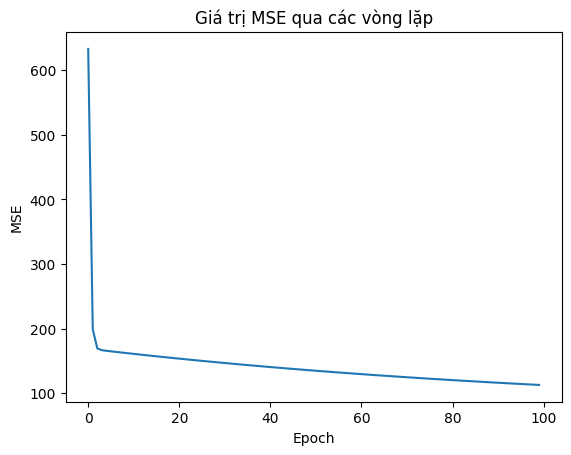

In [24]:
#BTVN2
#Tạo một tập dữ liệu giả lập với x là số giờ học(ngẫu nhiên từ 1-10) và y là số điểm được tính theo công thức y = 3x + 5 + noise
#Với noise là một giá trị ngẫu nhiên nhỏ
 #1. Khởi tạo tham số w và b ngẫu nhiên với requires_grad = true
 #2. Tính MSE
 #3. Tính gradient
 #4. Cập nhật tham số w và b bằng gradient Descent với Learning rate alpha = 0.01
 #5. Lặp lại quá trình trên trong 100 vòng lặp và quan sát sự hội tụ của mô hình


import torch
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu giả lập
np.random.seed(0)  # Để có kết quả tái lập
x = np.random.randint(1, 11, size=100)  # Số giờ học ngẫu nhiên từ 1-10
noise = np.random.normal(0, 1, size=x.shape)  # Noise ngẫu nhiên
y = 3 * x + 5 + noise  # Công thức tính y

# Chuyển đổi dữ liệu sang tensor
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Khởi tạo tham số w và b ngẫu nhiên với requires_grad = True
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Hyperparameters
alpha = 0.01  # learning rate
num_epochs = 100  # số vòng lặp

# Lưu giá trị MSE để vẽ biểu đồ
mse_history = []

for epoch in range(num_epochs):
    # Dự đoán y
    y_pred = x_tensor @ w + b

    # Tính MSE
    mse = ((y_pred - y_tensor) ** 2).mean()
    mse_history.append(mse.item())

    # Tính gradient
    mse.backward()

    # Cập nhật tham số w và b
    with torch.no_grad():
        w -= alpha * w.grad
        b -= alpha * b.grad

    # Đặt lại gradient về 0
    w.grad.zero_()
    b.grad.zero_()

# In ra tham số sau khi huấn luyện
print(f"Giá trị w: {w.item()}, Giá trị b: {b.item()}")

# Vẽ biểu đồ MSE qua các vòng lặp
plt.plot(mse_history)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Giá trị MSE qua các vòng lặp')
plt.show()


In [26]:
#BTVN3,4
import torch
arr = np.arange(0,5)
x = torch.tensor(arr)
print(x)  # tensor([0, 1, 2, 3, 4])

arr[0] = 99
print(x)  # tensor([0, 1, 2, 3, 4])


# Tạo tensor rỗng với kích thước (2, 3)
x = torch.empty(2, 3)
print(x)
print("               ")
# Tạo tensor chứa toàn số 0 với kích thước (2, 3)
x = torch.zeros(2, 3)
print(x)
print("               ")
# Tạo tensor chứa toàn số 1 với kích thước (2, 3)
x = torch.ones(2, 3)
print(x)
print("               ")
# Tạo tensor với giá trị ngẫu nhiên từ phân phối đều trong khoảng [0, 1) với kích thước (2, 3)
x = torch.rand(2, 3)
print(x)
print("               ")
# Tạo tensor với kích thước (2, 3)
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print("               ")
# Reshape tensor thành kích thước (3, 2) sử dụng view
y = x.view(3, 2)
print(y)
print("               ")
# Reshape tensor thành kích thước của tensor khác sử dụng view_as
z = torch.tensor([[1, 2], [3, 4], [5, 6]])
y = x.view_as(z)
print(y)

tensor([0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4])
tensor([[4.4670e+25, 4.3739e-41, 4.9859e-31],
        [0.0000e+00, 4.4842e-44, 0.0000e+00]])
               
tensor([[0., 0., 0.],
        [0., 0., 0.]])
               
tensor([[1., 1., 1.],
        [1., 1., 1.]])
               
tensor([[0.7587, 0.7363, 0.8009],
        [0.0660, 0.9493, 0.7202]])
               
               
tensor([[1, 2],
        [3, 4],
        [5, 6]])
               
tensor([[1, 2],
        [3, 4],
        [5, 6]])
